In [1]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

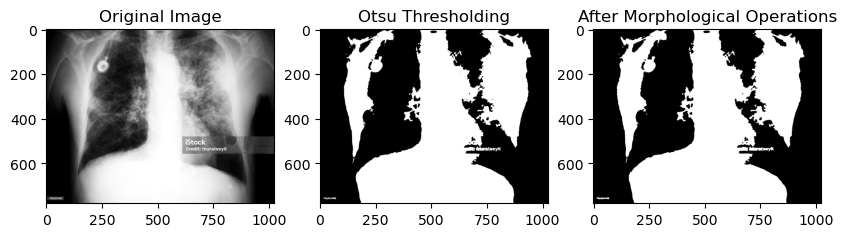

In [4]:
# Load the image
image = cv2.imread('/Users/vinayakshanbhag/Downloads/image2.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Otsu's thresholding
ret, otsu_threshold = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Optionally, apply morphological operations to clean up the image
kernel = np.ones((3, 3), np.uint8)
morphed = cv2.morphologyEx(otsu_threshold, cv2.MORPH_CLOSE, kernel)

# Display the results
plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Otsu Thresholding')
plt.imshow(otsu_threshold, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('After Morphological Operations')
plt.imshow(morphed, cmap='gray')

plt.show()


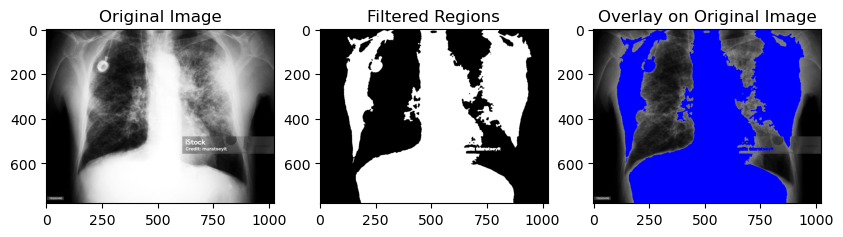

Percentage of lung area that is damaged: 99.98%


In [5]:
# Find connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(morphed, connectivity=8)

# Filter out small regions
min_size = 500  # Adjust the size threshold based on the specific case
filtered_labels = np.zeros(labels.shape, dtype=np.uint8)

for i in range(1, num_labels):
    if stats[i, cv2.CC_STAT_AREA] >= min_size:
        filtered_labels[labels == i] = 255

# Optionally, overlay the regions on the original image
overlay = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
overlay[filtered_labels == 255] = [0, 0, 255]  # Mark regions in red

# Calculate the percentage of damaged lung area
lung_area = np.sum(filtered_labels == 255)
total_area = np.sum(otsu_threshold == 255)
damage_percentage = (lung_area / total_area) * 100

# Display the results
plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Filtered Regions')
plt.imshow(filtered_labels, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Overlay on Original Image')
plt.imshow(overlay)

plt.show()

print(f"Percentage of lung area that is damaged: {damage_percentage:.2f}%")
